In [1]:
import cptac
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()

cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


In [3]:
gene = "PIK3CA"

In [4]:
endo = en.get_genotype_all_vars(gene)
gbm = g.get_genotype_all_vars(gene)
hnscc = hn.get_genotype_all_vars(gene)
ovar = o.get_genotype_all_vars(gene)
cc = c.get_genotype_all_vars(gene)
colon = col.get_genotype_all_vars(gene)
ld = l.get_genotype_all_vars(gene)
brca = b.get_genotype_all_vars(gene)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 89 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 100 samples for the PIK3CA gene (/Users/hann

In [5]:
# m = b.get_somatic_mutation()
# s = m.loc[m["Gene"]=="PTEN"]
# s.loc[s.index == "CPT000814"]


In [6]:
# cnv = b.get_CNV()
# cn = b.reduce_multiindex(cnv, levels_to_drop="Database_ID")
# cn = cn[['PTEN']]
# cn.loc[cn.index=='CPT000814']

In [7]:
def plot_mutations(dflist = None, names_of_df=None):
    number_of_df = len(dflist)
    
    allLabels = []
    for df in dflist:
        #get the labels for each and make a combined label that they'll all use
        mutation = df["Mutation"]
        labels = set(mutation)
        allLabels.append(labels)
    
    flat_list = [item for sublist in allLabels for item in sublist]
    all_labels = list(set(flat_list))
    all_labels.sort()
    allLabels = all_labels
    
#     For each df, add na to their labels if it doesn't exist in all_labels
    labels_for_each_df = []
    frequencies_for_each_df = []
    for df in dflist:
        mutation = df["Mutation"].tolist()
        mutationlist = list(set(mutation))
        mutationlist.sort()
        ordered_mut_list = []
        match = True
        mutPosition = 0
        
        for position in range(len(all_labels)):
            try:
                
                if mutationlist[mutPosition] == all_labels[position]:
                    ordered_mut_list.append(mutationlist[mutPosition])
                    mutPosition += 1

                else:
                    ordered_mut_list.append("na")

            except IndexError:  
                ordered_mut_list.append("na")
       
        
        labels_for_each_df.append(ordered_mut_list)

        #get the freq of each mutation type
        freq = []
        for mutation_type in ordered_mut_list:
            freq.append(mutation.count(mutation_type))

        PercentFreq = [x*100 / sum(freq) for x in freq]
        frequencies_for_each_df.append(PercentFreq)
        
        
#     import pdb; pdb.set_trace()
    #Now plot it using arrays
    width = 0.1
    x = np.arange(len(allLabels))
    a4_dims = (13, 10) #dimensions for bigger plot
    fig, ax = plt.subplots(figsize=a4_dims)
    for position in range(0, number_of_df):
        r = ax.bar(x+(width*position), frequencies_for_each_df[position], width,label=names_of_df[position], alpha=.5, linewidth=0)



    ax.set_ylabel('Percent Sample')
    ax.set_title('Mutation Frequency and Effect')
    ax.set_xticks(x)
    ax.set_xticklabels(allLabels)
    ax.legend()
    



    fig.tight_layout()
    plt.setp(ax.get_xticklabels(),rotation='vertical')
    plt.savefig('step1_PIK3CA.png')
    plt.show()
    

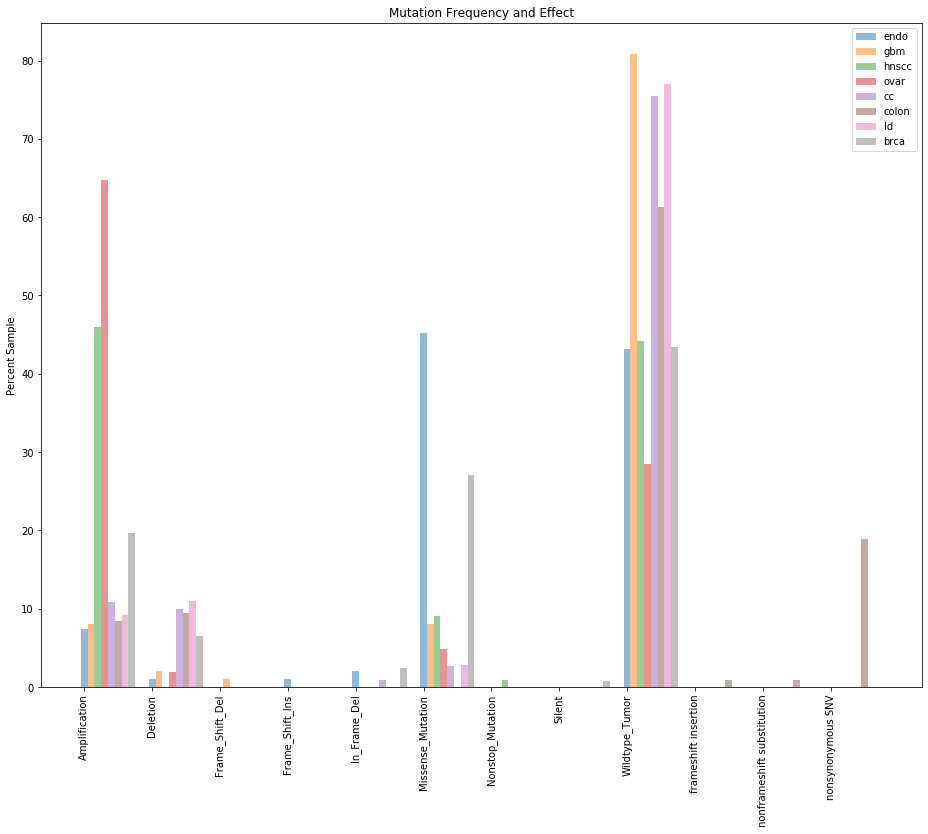

In [8]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca]
names = ['endo', 'gbm', 'hnscc', 'ovar', 'cc', 'colon', 'ld', 'brca']
plot_mutations(dfs, names)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#we need to plot cis effects
allLabels = []
mutation = endo["Mutation"]
labels = set(mutation)
allLabels.append(labels)

flat_list = [item for sublist in allLabels for item in sublist]
all_labels = list(set(flat_list))
all_labels.sort()
allLabels = all_labels

labels_for_each_df = []
frequencies_for_each_df = []

mutationlist = endo["Mutation"].unique()
mutationlist.sort()
ordered_mut_list = []
match = True
mutPosition = 0

for position in range(len(all_labels)):
            try:
                
                if mutationlist[mutPosition] == all_labels[position]:
                    ordered_mut_list.append(mutationlist[mutPosition])
                    mutPosition += 1

                else:
                    ordered_mut_list.append("na")

            except IndexError:  
                ordered_mut_list.append("na")
                
labels_for_each_df.append(ordered_mut_list)

#get the freq of each mutation type
freq = []
endo[['Mutation']].count()
# import pdb; pdb.set_trace()
# for mutation_type in ordered_mut_list:
#     freq.append(endo['Mutation'].count)
#     freq.append(endo['Mutation'].count(mutation_type))

# PercentFreq = [x*100 / sum(freq) for x in freq]
# frequencies_for_each_df.append(PercentFreq)

Name
Mutation    95
dtype: int64

In [57]:
#making it a function
def mutation_type_abundance(df, gene, cancer_type):
    #get the somatic_mutation df
    somatic_mutations = df.get_somatic_mutation()
    omics_mutations = df.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes=gene, 
                                             omics_genes=gene, mutations_filter=[])
    #if it's Ccrcc or Ovarian we need to reduce the multiindex
    if isinstance(df, cptac.Ovarian) or isinstance(df, cptac.Ccrcc) or isinstance(df, cptac.Luad) or isinstance(df, cptac.Brca):
        omics_mutations = df.reduce_multiindex(df=omics_mutations, levels_to_drop="Database_ID")

    #filter out the normal 
    mutation = omics_mutations.loc[omics_mutations['Sample_Status'] == "Tumor"]
    mutations = mutation.drop(columns=[gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"])
    
    mutation_types_df = df.get_genotype_all_vars(gene)
    plotting_df = pd.concat([mutation_types_df, mutations], axis=1)
    
    #sort the df so that the same mutations will show up for every tumor type
    plotting_df = plotting_df.sort_values('Mutation')
    
    a4_dims = (11.7, 8.27) #dimensions for bigger plot
    fig, ax = plt.subplots(figsize=a4_dims)

    somatic_boxplot = sns.boxplot(data=plotting_df, x="Mutation",y=gene +"_proteomics", ax = ax) 
                                            # order parameter is used to reorder the mutation categories 
            
    somatic_boxplot.set_title(cancer_type +" PIK3CA gene mutation protein abundance")
    somatic_boxplot = sns.stripplot(data=plotting_df, x="Mutation",y=gene +"_proteomics",jitter=True, 
                                    color=".3")
    somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
    somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
    plt.show()
    
    



cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 97 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


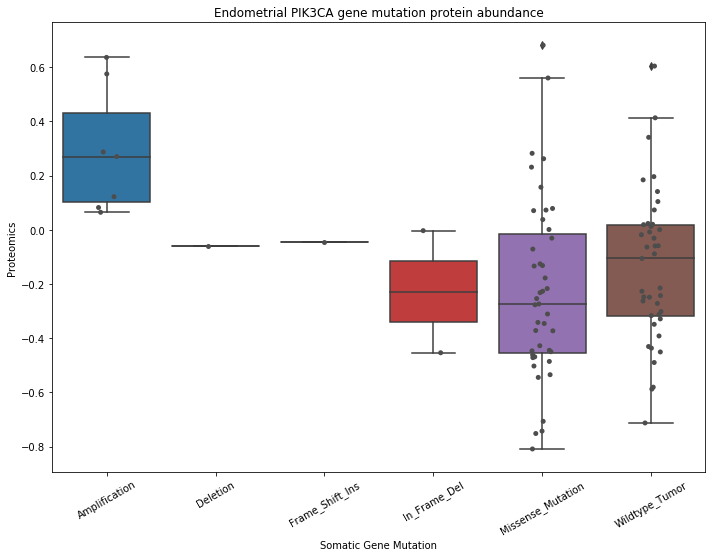

In [24]:
mutation_type_abundance(en, "PIK3CA", "Endometrial")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 89 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


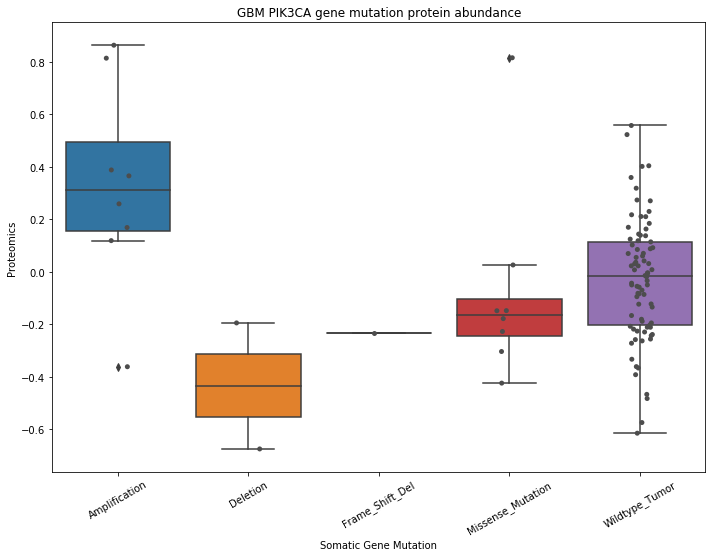

In [25]:
mutation_type_abundance(g, "PIK3CA", "GBM")

cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: Unknown mutation type Nonstop_Mutation. Assigned lowest priority in filtering. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest priority in filtering. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: Unknown mutation type Missense_Mutation. Assigned lowest

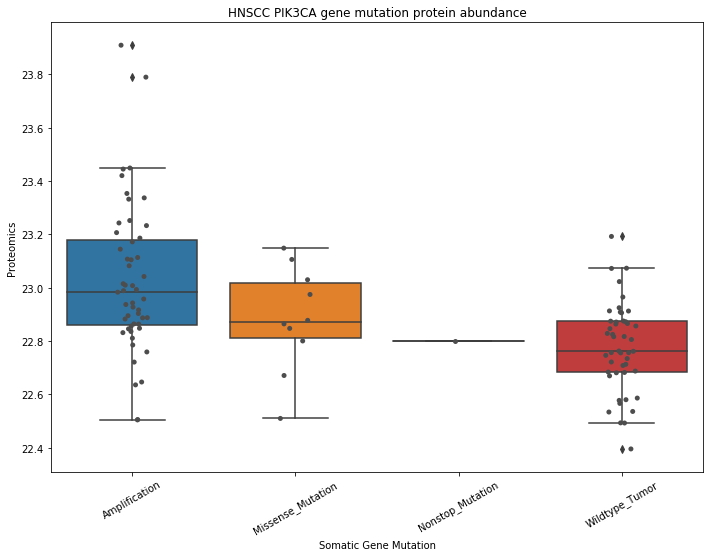

In [26]:
mutation_type_abundance(hn, "PIK3CA", "HNSCC")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 98 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 97 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01OV029, 02OV015 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


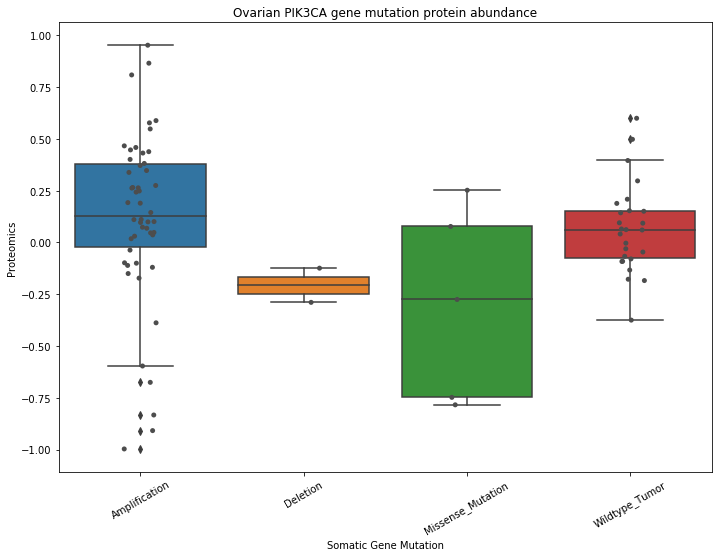

In [27]:
mutation_type_abundance(o, "PIK3CA", "Ovarian")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 190 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 106 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


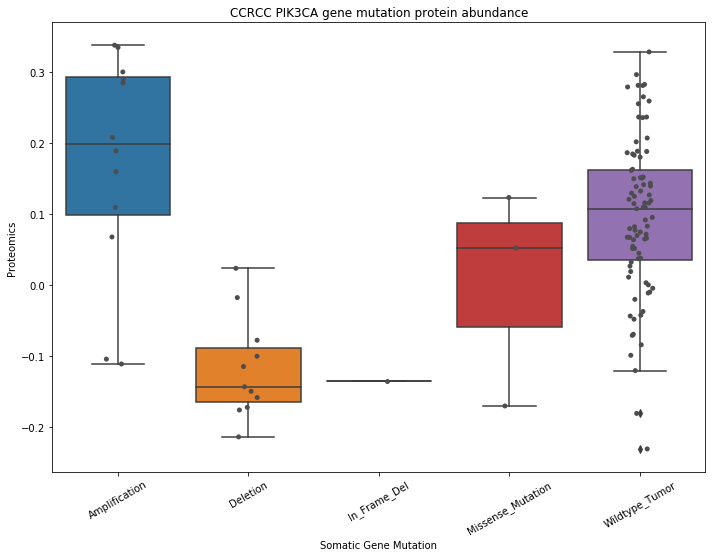

In [28]:
mutation_type_abundance(c, "PIK3CA", "CCRCC")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 183 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for

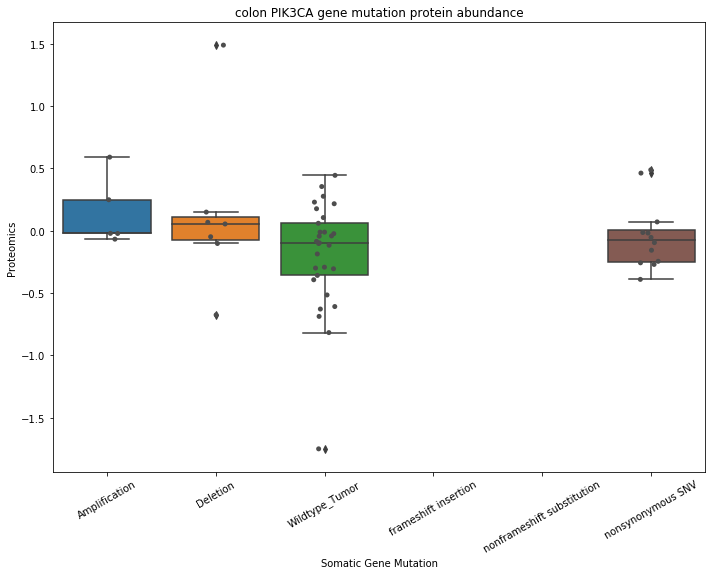

In [32]:
mutation_type_abundance(col, "PIK3CA", "colon")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 208 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 106 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


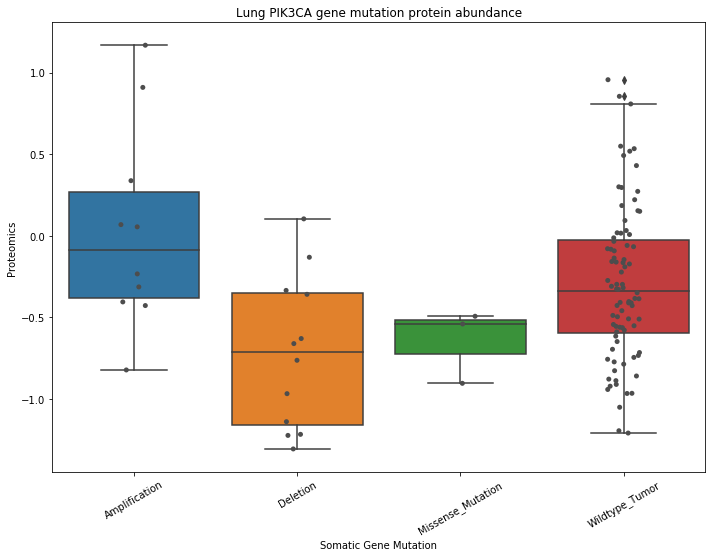

In [37]:
mutation_type_abundance(l, "PIK3CA", "Lung")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 6)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


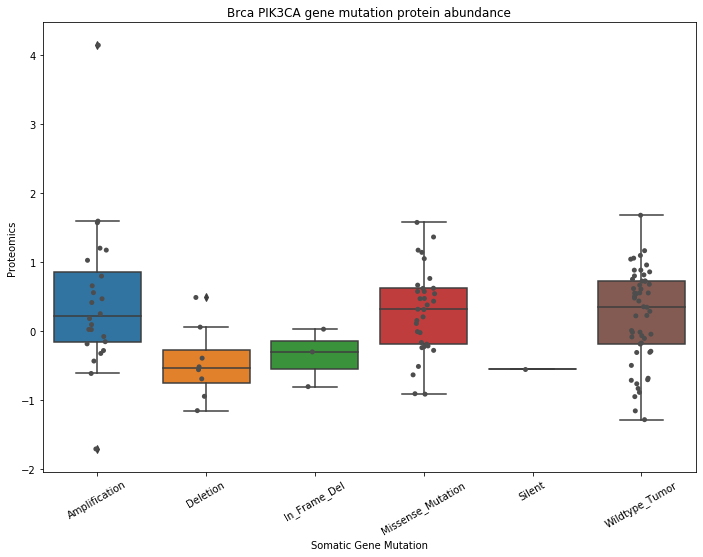

In [58]:
mutation_type_abundance(b, "PIK3CA", "Brca")